In [2]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [3]:
api_key = '<Your YouTube api key>' # enter your own api key

channel_ids = ['UCsTcErHg8oDvUnTzoqsYeNw',  # Unbox therapy
              'UCBJycsmduvYEL83R_U4JriQ',  # MKBHD
              'UCWFKCr40YwOZQx8FHU_ZqqQ',   # JRE
              'UCXUJJNoP1QupwsYIWFXmsZg' ]  # Tech Burner]

# Creating youtube service and storing in youtube object
youtube = build('youtube', 'v3', developerKey=api_key) 

## function to get channel stats

In [4]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                   Subscribers = response['items'][i]['statistics']['subscriberCount'],
                   Views = response['items'][i]['statistics']['viewCount'],
                   Total_videos = response['items'][i]['statistics']['videoCount'],
                   playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
        
    return all_data

channel_statistics = get_channel_stats(youtube, channel_ids)

In [5]:
# loading the channel data in a dataframe
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Tech Burner,10200000,1552468878,1069,UUXUJJNoP1QupwsYIWFXmsZg
1,Marques Brownlee,16700000,3379154607,1520,UUBJycsmduvYEL83R_U4JriQ
2,Unbox Therapy,18200000,4426103421,2110,UUsTcErHg8oDvUnTzoqsYeNw
3,JerryRigEverything,7610000,1597104562,968,UUWFKCr40YwOZQx8FHU_ZqqQ


In [6]:
# Converting the channel attribute datatypes to integer
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])

channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

# Visualisations

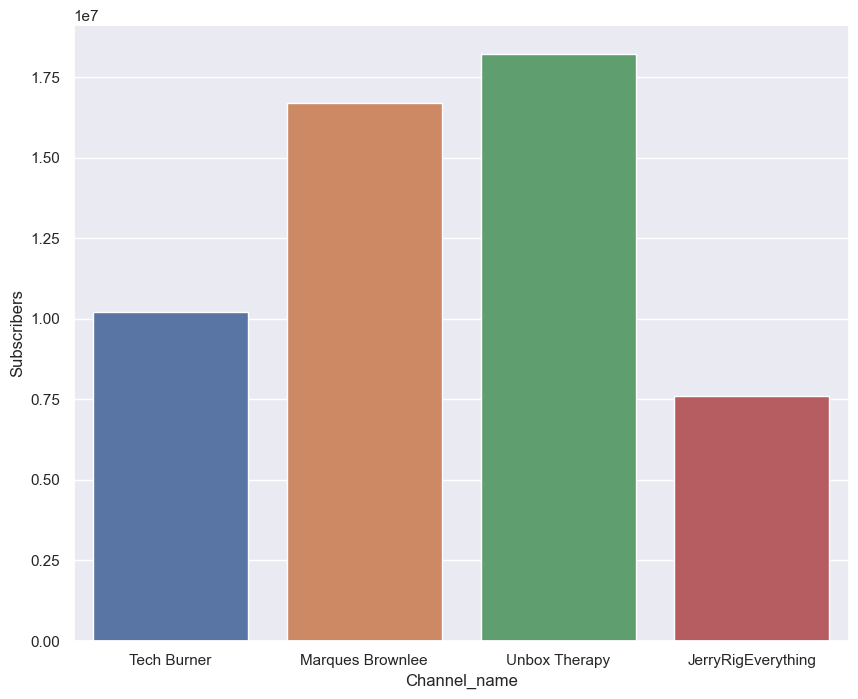

In [7]:
# Constructing simple barplot of channel name vs subscribers
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

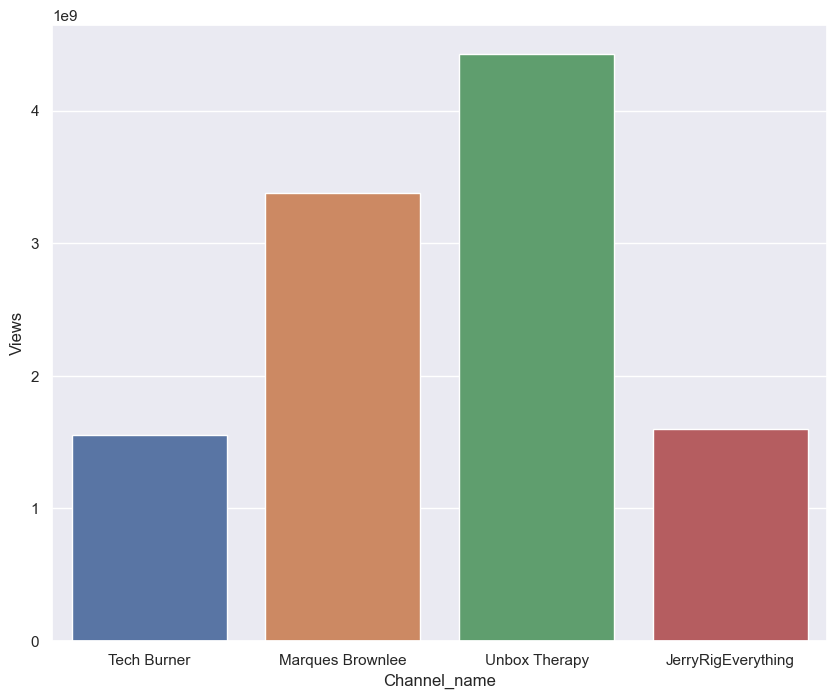

In [8]:
# Constructing simple barplot of channel name vs Views
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

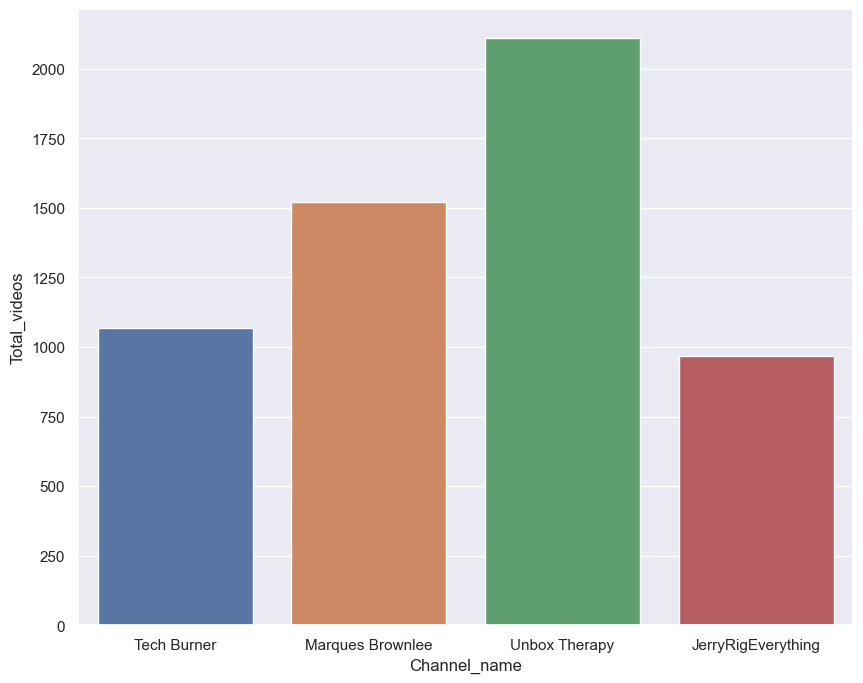

In [9]:
# Constructing simple barplot of channel name vs Posted videos
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

# Function to get video ids

In [10]:
# Fetching playlist id from unbox therapy channel
playlist_id = channel_data.loc[channel_data['Channel_name']=='Unbox Therapy', 'playlist_id'].iloc[0]
playlist_id

'UUsTcErHg8oDvUnTzoqsYeNw'

In [11]:
# Fetching video ids from the playlist
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId = playlist_id,
        maxResults = 50)
    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50,
                pageToken = next_page_token)
            response = request.execute()
            
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
    
    return video_ids




In [12]:
video_ids = get_video_ids(youtube, playlist_id)
video_ids

['Hwg7h4RS4oM',
 'URj8EwzeAnU',
 'hnITI8WpKZo',
 'QNOgKeAFXRc',
 '98Vsd3Gh99s',
 'BdC1cXqk2Gg',
 '54czFZTvD28',
 'QO2u33iOn3E',
 'ZFJjrwkyhtE',
 'fghtWIIRd08',
 'TepLNe82KEA',
 'kx1A6XZQzy0',
 '11Ut-DhIHE4',
 '38sG0OWPcRI',
 'Zz8Rsrpv6UQ',
 'HozvPI7kRPA',
 'GYRU2jyZsA4',
 'EhbFykjkYUQ',
 'O2J8ehB-_OI',
 '1tS6PSkHFx0',
 'd73bgT3K218',
 '3S_FyprPQIE',
 'Zj02Pe86N9A',
 'Ef4lOK1wZ9E',
 'pMvjObEhN8I',
 'FrsFydLvOeE',
 'kHf8TzgwiI0',
 'QdKM2lONcVY',
 'lZUQyzA5Yds',
 '0ZRJ2qPSZoc',
 'MaGbP1MT76w',
 'VVhlW4GtNPE',
 'O4t3qqC7thI',
 's3f2SLYHLBs',
 'r66-vYgr7G0',
 'z0lOO4Ta1M8',
 'iFYLG2yvuMo',
 'xKGLH-E_Jrw',
 'SWrXT5X-Ke4',
 '4M-U8Ad9PMw',
 'ERG_whxcoww',
 'il7Pl_Cy7l0',
 'kKHW0AlMkFo',
 'UioklHICCvk',
 'zMBBygBhIO4',
 'rzetqrZUeyQ',
 'RyfV1mPpdt0',
 '2Qsn7QHS1XU',
 'QcUp7BIJNec',
 'KPU3-oxyqAk',
 'DLILlKdELEk',
 'U39y60lKzb0',
 'ZqyAI1L_Seo',
 'M9OEB_BzRjA',
 'v0rhBaGAaVU',
 'qkrgcJ3HX3o',
 'F7WgLq-U2SA',
 'Xl9qVBP4cwE',
 'VdMEP9ScpUg',
 '0W_hQ-ANcMs',
 'PuIbb2Z9Vks',
 '1W2sruZ9LaQ',
 'Iz7mtw

# Function to get video details

In [19]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet, statistics',
            id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                              Published_date = video['snippet']['publishedAt'],
                              Views = video['statistics']['viewCount'],
                              Likes = video['statistics']['likeCount']
                              )# dislike count has been removed from YT API
            all_video_stats.append(video_stats)
    return all_video_stats
    

In [20]:
# Loading the video details in our dataframe
video_data = pd.DataFrame(get_video_details(youtube, video_ids))

In [21]:
video_data

,Title,Published_date,Views,Likes
0,Wait til you see what this new gadget can do...,2023-02-22T21:14:21Z,145898,7772
1,Is this your next smartphone?,2023-02-20T01:04:14Z,205440,9794
2,You Need to See This New Smartphone…,2023-02-17T17:31:07Z,1067681,30644
3,It's a weird way to power a Tesla...,2023-02-15T17:40:52Z,30271,967
4,Dual Screen Lenovo Laptop Apple MacBook iPad K...,2023-02-09T12:56:22Z,85141,3501
...,...,...,...,...
2106,Apple Magic Trackpad Unboxing & Overview,2011-01-08T06:39:25Z,26413,494
2107,GoPro HD Motorsports HERO Camera Unboxing & Ov...,2011-01-06T06:32:51Z,88867,595
2108,Samsung Galaxy Tab Unboxing (Bell Version),2011-01-04T09:14:07Z,69026,1122
2109,Boxee Box Unboxing & Device Overview,2011-01-04T06:39:04Z,160986,1609


In [22]:
# Modifyling the columns
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data

,Title,Published_date,Views,Likes
0,Wait til you see what this new gadget can do...,2023-02-22,145898,7772
1,Is this your next smartphone?,2023-02-20,205440,9794
2,You Need to See This New Smartphone…,2023-02-17,1067681,30644
3,It's a weird way to power a Tesla...,2023-02-15,30271,967
4,Dual Screen Lenovo Laptop Apple MacBook iPad K...,2023-02-09,85141,3501
...,...,...,...,...
2106,Apple Magic Trackpad Unboxing & Overview,2011-01-08,26413,494
2107,GoPro HD Motorsports HERO Camera Unboxing & Ov...,2011-01-06,88867,595
2108,Samsung Galaxy Tab Unboxing (Bell Version),2011-01-04,69026,1122
2109,Boxee Box Unboxing & Device Overview,2011-01-04,160986,1609


In [23]:
# Finding top 10 videos
top10_video = video_data.sort_values(by = 'Views', ascending=False).head(10)

In [24]:
top10_video

,Title,Published_date,Views,Likes
1414,iPhone 6 Plus Bend Test,2014-09-23,73715779,352644
723,This Smartphone Changes Everything...,2018-06-19,21994011,352366
1173,This Cup Is Unspillable - What Magic Is This?,2016-07-03,20566883,420080
1248,The 4 Dollar Android Smartphone,2016-03-11,20450941,349469
843,Unboxing The Mind Bending Wallpaper TV...,2017-10-01,19866010,256633
1019,"Unboxing The $20,000 Smartphone",2016-12-25,19306117,265647
951,Unboxing The $3000 Bluetooth Speaker,2017-04-12,19203859,382018
521,Samsung Galaxy Fold Unboxing,2019-04-15,18067462,340267
740,"The ULTIMATE $30,000 Gaming PC Setup",2018-05-13,14859595,306809
718,I'm Giving Away 106 Smartphones...,2018-06-27,14801569,191543


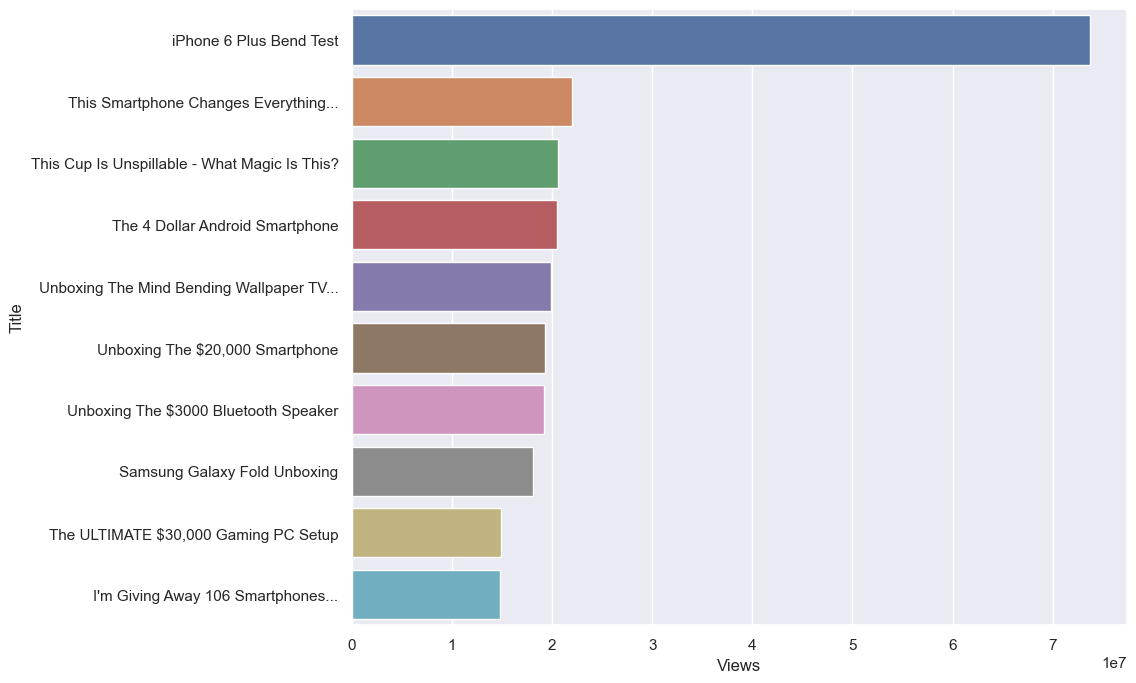

In [26]:
# Barplot
ax1 = sns.barplot(x='Views', y='Title', data=top10_video)

# ANALYSIS

In [27]:
# Videos posted in a month
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')
video_data

,Title,Published_date,Views,Likes,Month
0,Wait til you see what this new gadget can do...,2023-02-22,145898,7772,Feb
1,Is this your next smartphone?,2023-02-20,205440,9794,Feb
2,You Need to See This New Smartphone…,2023-02-17,1067681,30644,Feb
3,It's a weird way to power a Tesla...,2023-02-15,30271,967,Feb
4,Dual Screen Lenovo Laptop Apple MacBook iPad K...,2023-02-09,85141,3501,Feb
...,...,...,...,...,...
2106,Apple Magic Trackpad Unboxing & Overview,2011-01-08,26413,494,Jan
2107,GoPro HD Motorsports HERO Camera Unboxing & Ov...,2011-01-06,88867,595,Jan
2108,Samsung Galaxy Tab Unboxing (Bell Version),2011-01-04,69026,1122,Jan
2109,Boxee Box Unboxing & Device Overview,2011-01-04,160986,1609,Jan


In [28]:
videos_per_month = video_data.groupby('Month', as_index = False).size()
videos_per_month

,Month,size
0,Apr,154
1,Aug,185
2,Dec,163
3,Feb,167
4,Jan,202
5,Jul,174
6,Jun,178
7,Mar,157
8,May,164
9,Nov,179


In [29]:
# Arranging data according to month order
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered=True)
videos_per_month.sort_index()

,Month,size
Month,,
Jan,Jan,202
Feb,Feb,167
Mar,Mar,157
Apr,Apr,154
May,May,164
Jun,Jun,178
Jul,Jul,174
Aug,Aug,185
Sep,Sep,212


In [30]:
videos_per_month = videos_per_month.sort_index()

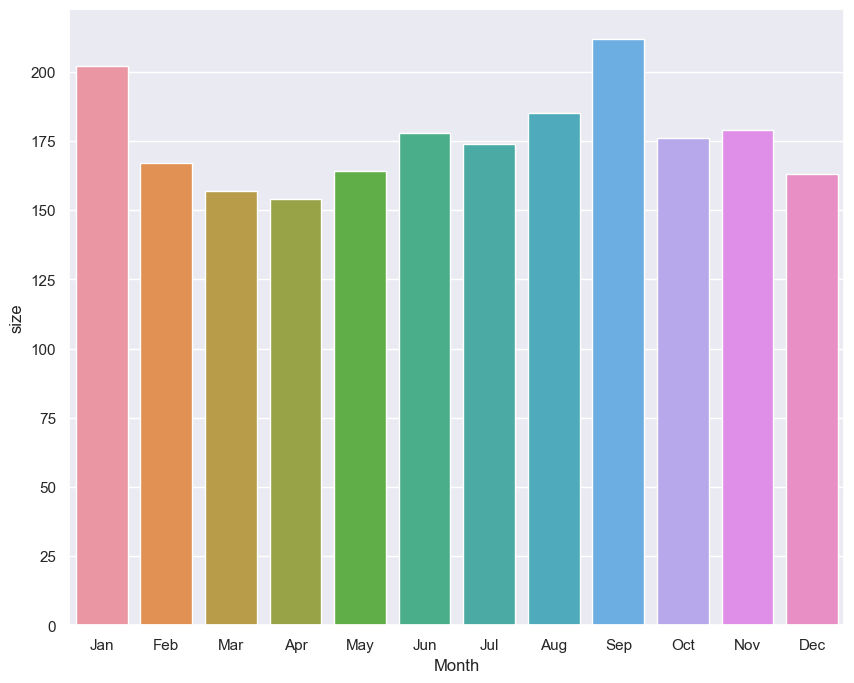

In [31]:
# Barplot
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

# ANALYSIS